# Исследование данных о российском кинопрокате
Заказчик этого исследования — Министерство культуры Российской Федерации.<br>
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю.
Будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

## Изучение файлов с данными и объединение их в один датафрейм. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
df_movies.info()
display(df_movies.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')
df_shows.info()
display(df_shows.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
0,111000113,2450.0
1,111000115,61040.0
2,111000116,153030013.4


Для объединения таблицы приведем к единому типу данных колонку `puNumber` в первой таблице по которой будем объединять.

В данных есть не "числовые" значения, заменим их все на NaN а потом удалим. Приведем данные к нужному типу.

In [4]:
df_movies['puNumber'] = pd.to_numeric(df_movies['puNumber'], errors='coerce')

In [5]:
df_movies['puNumber'].isna().sum()

1

In [6]:
df_movies.dropna(subset=['puNumber'], inplace=True)
df_movies['puNumber'].isna().sum()

0

In [7]:
df_movies['puNumber'] = df_movies['puNumber'].astype('int')

In [8]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [9]:
df = df_movies.merge(df_shows, on='puNumber', how='left')

In [10]:
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Привели столбец в первой таблице к числовому типу и объединили таблицы. Все данные из второй таблицы сохранились.

## Предобработка данных

### Проверка типов данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

Приведем дату к нормальному типу.

In [11]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y.%m.%d')

In [12]:
df.value_counts('ratings')

ratings
6.6    312
6.7    308
6.8    261
7.2    252
6.2    243
      ... 
1.8      1
1.9      1
19%      1
28%      1
1.0      1
Length: 94, dtype: int64

In [13]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

При попытке привести рейтинг к числовому типу было обнаружено, что некоторые данные записаны в другом формате, исправим это.

In [14]:
def convert(value):
    if isinstance(value['ratings'], str) and '%' in value['ratings']:
        return int(value['ratings'].rstrip('%')) / 10
    else:
        return value['ratings']

In [15]:
df['ratings'] = df.apply(convert, axis=1)

In [16]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', 9.9, '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', 2.8, '3.7', '1.4', '3.1', 9.7, '3.5',
       '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', 8.3,
       6.4, 9.1, 9.4, 6.2, 7.9, 9.0, 1.9, 8.8, '1.0', 8.9, '1.3', '1.9',
       '1.8', '1.2', '1.7', '9.0', 9.8, '8.9', '9.1'], dtype=object)

Привели дату к нужному типу данных и исправили ошибки в данных о рейтинге.

### Пропуски в датафрейме


In [17]:
base_counts = len(df)
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

Пропуски в данных `film_studio, production_country, director` совсем маленькие, их можно просто удалить. <br>

In [18]:
df.dropna(subset=['film_studio', 'production_country', 'director'], inplace=True)

In [19]:
df = df.reset_index(drop=True)

Пропуски в `producer` для нашего анализа не важны, можно оставить.

In [20]:
df.query('ratings.isna() and genres.isna()')['title'].count()

947

Пропуски в жанре и рейтинге явно связаны. При этом рейтинг и жанры есть на кинопоиске (проверено несколько). Возможна ошибка при выгрузке данных. Хорошо бы сообщить тем кто предоставил данные, может дадут новые хорошие данные. Если бы был платный доступ к API Кинопоиска, можно было бы обновить данные самим.<br>
Если удалим, то потеряем много других важных данных, заполнять средним или медианой рейтинг считаю не целесообразно. Для анализа только рейтинга предлагаю просто взять данные без этих пропусков в дальнейшем.<br>
Пропуски в жанрах можно заменить на `unknown`

In [21]:
df['genres'] = df['genres'].fillna(value='unknown')

Пропуски по бюджетным данным `refundable_support, nonrefundable_support, budget, financing_source` удалять не стоит, а для анализа государственной поддержки можно сделать отдельную таблицу без пропусков.

Данные о прокате в кинотеатрах известны не для всех фильмов, пропуски в `box_office` можно заменить на 0. Проверим, есть ли фильмы с доходом 0, чтобы не объединить их с пропусками лучше заменить пропуски на -1.

In [22]:
len(df[df['box_office'] == 0])

24

Есть фильмы с нулевым доходом, заменим пропуски на -1, чтобы можно было легко отфильтровать данные в дальнейшем. Аналогично сделаем и для колонки `budget`.

In [23]:
df['box_office'] = df['box_office'].fillna(value=-1)
df['budget'] = df['budget'].fillna(value=-1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7458 entries, 0 to 7457
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7458 non-null   object             
 1   puNumber               7458 non-null   int64              
 2   show_start_date        7458 non-null   datetime64[ns, UTC]
 3   type                   7458 non-null   object             
 4   film_studio            7458 non-null   object             
 5   production_country     7458 non-null   object             
 6   director               7458 non-null   object             
 7   producer               6894 non-null   object             
 8   age_restriction        7458 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 7458 non-null   float64          

In [25]:
print(f'Удалено: {base_counts - len(df)} строк.')

Удалено: 27 строк.


Удалили и обработали пропуски, потери составили 27 строк. Нашли ошибку выгрузки данных в колонках `ratings и genres`, нужно сообщить источнику данных.

### Дубликаты в датафрейме


In [26]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют. Проверим дубликаты по названию фильма.

In [27]:
df[df['title'].duplicated()].head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,-1.0,NaN,6.8,"фантастика,боевик,триллер",-1.0
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,-1.0,NaN,6.8,"фантастика,боевик,триллер",-1.0
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,-1.0,NaN,6.4,"мелодрама,комедия",-1.0
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,-1.0,NaN,7.7,"фэнтези,приключения,семейный",759526.0
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,-1.0,NaN,8.2,"фэнтези,приключения,семейный",1125302.0
122,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,121026216,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,NaN,NaN,-1.0,NaN,7.9,"фэнтези,приключения,семейный",843310.0
132,Джейн Эйр /По одноименному роману Шарлотты Бро...,221035716,2016-06-07 12:00:00+00:00,Художественный,"Чинеритино, Флаш Фильм, Медиасет, Мирамакс, Ро...",Франция - Италия - Великобритания - США,Франко Дзеффирелли,NaN,«12+» - для детей старше 12 лет,NaN,NaN,-1.0,NaN,7.4,"драма,мелодрама",-1.0
205,Кинг Конг _,221001815,2015-02-11 12:00:00+00:00,Художественный,"Биг Праймейт Пикчерз, Юниверсал Пикчерз, ВингН...",Новая Зеландия - США,Питер Джексон,"Йен Бленкин, Питер Джексон, Кэролайн Каннингэм...",«16+» - для детей старше 16 лет,NaN,NaN,-1.0,NaN,7.6,"боевик,драма,мелодрама",-1.0
268,Пуленепробиваемый.,121009103,2013-03-13 12:00:00+00:00,Художественный,"Лейкшор Интертейнмент, Мозаик Медиа Груп, Сайн...",США,Пол Хантер,"Джон Ву, Чарльз Ровен, Дуглас Сегал, Теренс Чанг",«12+» - для детей старше 12 лет,NaN,NaN,-1.0,NaN,6.7,"фэнтези,боевик,комедия",-1.0
379,Рапунцель: Запутанная история,224026712,2012-10-23 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,-1.0,NaN,7.9,"мультфильм,мюзикл,фэнтези",-1.0


In [28]:
df.query('title == "Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
121,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,221004816,2016-02-09 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,NaN,NaN,-1.0,NaN,7.9,"фэнтези,приключения,семейный",-1.0
122,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,121026216,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,NaN,NaN,-1.0,NaN,7.9,"фэнтези,приключения,семейный",843310.0
4417,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,221134410,2010-11-29 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,NaN,NaN,-1.0,NaN,7.9,"фэнтези,приключения,семейный",-1.0


Анализ дубликатов по названию выявил, что есть дубликаты, но у них разные даты стартов показов и разные прокатные удостоверения. Скорее всего фильмы показывались в разных киносетях или разных качествах в разное время. И в некоторых показах есть данные по сборам. Думаю удалять такие "дубликаты" не стоит.

Еще проверим нет ли дубликатов по прокатным удостоверениям.

In [29]:
df[df['puNumber'].duplicated()].head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4629,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,-1.0,NaN,7.6,"драма,мелодрама,история",-1.0
5056,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,-1.0,NaN,6.8,"комедия,криминал",-1.0


In [30]:
df[df['puNumber'] == 221154310]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4628,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,-1.0,NaN,7.0,"мелодрама,комедия",-1.0
4629,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,-1.0,NaN,7.6,"драма,мелодрама,история",-1.0


In [31]:
df[df['puNumber'] == 221054410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5055,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,-1.0,NaN,7.4,"комедия,криминал",-1.0
5056,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,-1.0,NaN,6.8,"комедия,криминал",-1.0


Всего два дубликата. Номера одинаковые, а фильмы разные. Возможно ошибка в данных, можно сообщить в источник данных о найденной ошибке. Прокатный номер у нас в аналитике не учавствует, можно не удалять эти дубликаты.

Явных дубликатов не нашли. Нашли две ошибки в данных о прокатных удостоверениях.

### Категориальные значения


In [32]:
df.value_counts('type')

type
Художественный                4513
 Художественный               1384
Анимационный                   828
Прочие                         401
Документальный                 280
Научно-популярный               50
 Анимационный                    1
Музыкально-развлекательный       1
dtype: int64

In [33]:
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [34]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'unknown', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комед

В категориальных данных есть пробелы в начале и конце строки, исправим это.

In [35]:
df['type'] = df['type'].str.strip()
df['production_country'] = df['production_country'].str.strip()
df['genres'] = df['genres'].str.strip()

In [36]:
df.value_counts('type')

type
Художественный                5897
Анимационный                   829
Прочие                         401
Документальный                 280
Научно-популярный               50
Музыкально-развлекательный       1
dtype: int64

In [37]:
df.value_counts('age_restriction')

age_restriction
«16+» - для детей старше 16 лет           2848
«18+» - запрещено для детей               1601
«12+» - для детей старше 12 лет           1583
«0+» - для любой зрительской аудитории     803
«6+» - для детей старше 6 лет              623
dtype: int64

Тут все хорошо.<br>
Так же в названиях фильмов были замечены лишние символы в конце строки - `".", " _"`, удалим пробелы и ненужные символы.

In [38]:
df['title'] = df['title'].str.strip()
df['title'] = df['title'].str.rstrip('.')
df['title'] = df['title'].str.rstrip(' _')

Удалим возможные пробелы в начале и конце строки в оставшихся колонках.

In [39]:
df['film_studio'] = df['film_studio'].str.strip()
df['director'] = df['director'].str.strip()
df['producer'] = df['producer'].str.strip()

В данных production_country обнаружено, что данные разделены не как везде запятой. Приведем к единому виду.

In [40]:
df['production_country'] = df['production_country'].str.replace(' -', ',').str.replace('- ', ',').str.replace(' - ', ',').str.replace('-', ',')

In [41]:
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия,Великобритания', 'Великобритания, Италия',
       'Чехословакия', 'США, Франция, Турция', 'Новая Зеландия',
       'Канада, Франция, Испания', 'США,Германия', 'США, Великобритания',
       'Великобритания', 'США, Германия', 'Франция, Мексика, США',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания,США,Германия,КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США, Франция', 'США, Япония, Франция, Великобритания',
       'Гонконг, Сингапур, Таиланд, Великобритания', 'США,Канада',
       'Франция, Италия, Великобритания, США', 'Франция, США',
       'Ирландия,Великобритания,Германия', 'Чехия', 'США,Австралия',
       'СССР, Финляндия', 'США,Франция,Великобритания,Австрия',
       'США, Бельгия', 'США, Ирландия, Великобритания',
       'Великобритания, США',
       'Люксембург, Нидерланды, Испания, Великобрит

In [42]:
df.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,-1.0,NaN,7.2,"боевик,драма,мелодрама",-1.0
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,-1.0,NaN,6.6,"драма,военный",-1.0
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,-1.0,NaN,6.8,"фантастика,боевик,триллер",-1.0


Проверим, не появились ли явные дубликаты.

In [43]:
df.duplicated().sum()

0

### Количественные значения

In [44]:
df.query('budget > 0').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1280,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6
1446,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,unknown,28140.0
1496,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5
1522,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5
1789,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0
1850,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.0,25000000.0,51850000.0,Министерство культуры,6.1,"мультфильм,фэнтези,история",15078858.6
1866,А зори здесь тихие...,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.0,100000000.0,220588394.0,Фонд кино,8.5,"драма,военный,история",249166767.7
1867,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.0,46502299.0,86210067.0,"Министерство культуры, Фонд кино",6.7,драма,4731239.5
1899,Призрак,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.0,75000000.0,139551503.0,Фонд кино,7.0,"триллер,боевик,приключения",352804320.4
1908,Ведьма,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.0,34000000.0,48571430.0,Министерство культуры,7.4,"фэнтези,приключения,драма",51907.5


In [45]:
df.query('nonrefundable_support > budget').head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2049,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.1
2054,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446163511.0
2468,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",196572438.4


В некоторых данных бюджет - 0, но деньги выделены. Заменим бюджет на выделенные деньги государственной поддержки. Сделаем колонку с суммой полной поддержки и сделаем замену.

In [46]:
df['full_support'] = df['refundable_support'] + df['nonrefundable_support']

In [47]:
idx = df.query('full_support > budget').index
df.loc[idx, 'budget'] = df.loc[idx, 'full_support']

In [48]:
df.query('full_support > budget').head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,full_support


Проверим данные на аномалии и выбросы. Для обнаружения выбросов будем использовать метод межквартильного диапазона (IQR).

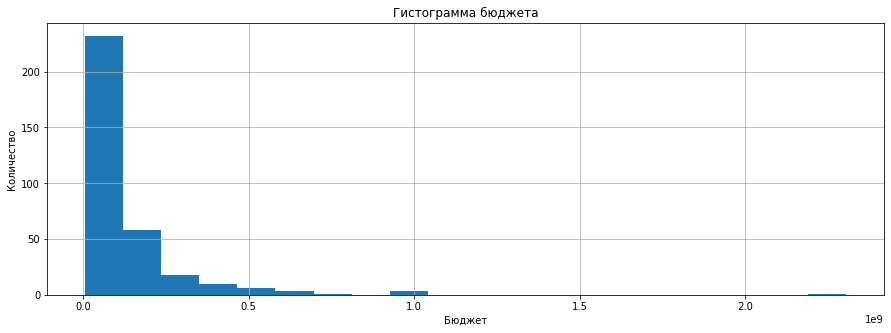

In [49]:
plt.figure(figsize = (15,5))
df.query('budget >= 0')['budget'].hist(bins=20)
plt.title('Гистограмма бюджета')
plt.xlabel('Бюджет')
plt.ylabel('Количество')
plt.show()

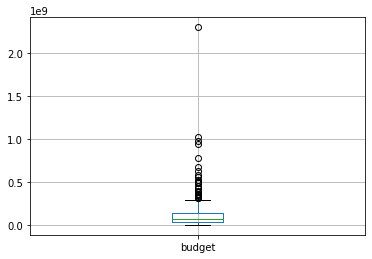

In [50]:
df.query('0 <= budget')[['budget']].boxplot()
plt.show()

На диаграмме и гистограмме видно выбросы и редкие значения. Гистограмма имеет не нормальное распределение. Определим границу и уберем выбросы.

Напишем функцию определения диапазонов выбросов.

In [51]:
def clear_IQR(value):
    Q1 = value.quantile(0.25)
    Q3 = value.quantile(0.75)
    iqr = Q3 - Q1
    return Q1 - 1.5 * iqr, Q3 + 1.5 * iqr

In [52]:
budget_bounds = clear_IQR(df.query('0 <= budget')['budget'])

In [53]:
len(df.query('budget > @budget_bounds[1]')) / len(df.query('0 <= budget')) *100

8.433734939759036

Будет удалено 8% данных, что приемлемо.

In [54]:
df = df.query('budget < @budget_bounds[1]')

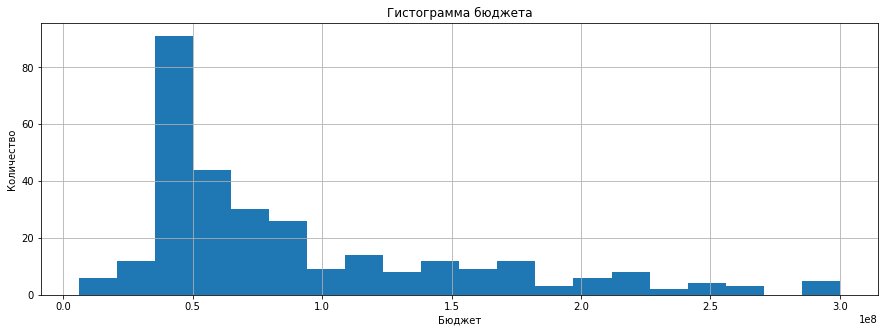

In [55]:
plt.figure(figsize = (15,5))
df.query('budget >= 0')['budget'].hist(bins=20)
plt.title('Гистограмма бюджета')
plt.xlabel('Бюджет')
plt.ylabel('Количество')
plt.show()

Теперь имеем более нормальное распределение.

### Добавление новых столбцов





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [56]:
df['show_start_year'] = pd.DatetimeIndex(df['show_start_date']).year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [57]:
def first_el(value):
    return value.split(',')[0] if isinstance(value, str) else value

In [58]:
df['main_producer'] = df['producer'].apply(first_el)
df['main_genre'] = df['genres'].apply(first_el)
df.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,full_support,show_start_year,main_producer,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,-1.0,NaN,7.2,"боевик,драма,мелодрама",-1.0,NaN,2015,Дэвид Валдес,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,-1.0,NaN,6.6,"драма,военный",-1.0,NaN,2016,NaN,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,-1.0,NaN,6.8,"фантастика,боевик,триллер",-1.0,NaN,2016,Джим Лемли,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [59]:
df['part_support'] = df['full_support'] / df['budget']

In [60]:
df.query('full_support > 0').head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,full_support,show_start_year,main_producer,main_genre,part_support
1280,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,26500000.0,2013,А.Атанесян,драма,0.333703
1446,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,37142857.0,Министерство культуры,NaN,unknown,28140.0,26000000.0,2014,А.Тютрюмов,unknown,0.700000
1496,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,107847945.0,2013,Р.Давлетьяров,комедия,0.612691


In [61]:
print(base_counts - len(df))

55


### Краткий вывод
Привели типы данных к нужным. Удалили и заполнили пропуски. Исправили ошибки в категориальных и количественных значениях. Очистили данные от выбросов.<br>
Добавили новые столбцы - главный режиссёр, основной жанр и долю гос поддержки в бюджете фильма. <br>
Потери в данных составили 55 строк.


## Исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [62]:
df.query('box_office >= 0').pivot_table(index='show_start_year', values='box_office', aggfunc='count')

,box_office
show_start_year,
2010,105
2011,109
2012,127
2013,184
2014,279
2015,461
2016,521
2017,349
2018,470


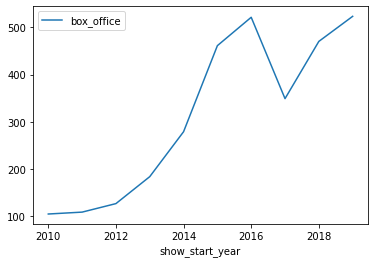

In [63]:
df.query('box_office >= 0').pivot_table(index='show_start_year', values='box_office', aggfunc='count').plot()
plt.show()

In [64]:
len(df.query('box_office >= 0')) / len(df)

0.4209959623149394

Доля фильмов с указанной информацией о прокате в кинотеатрах составляет 42%.

,count
show_start_year,
2010,0.107143
2011,0.175806
2012,0.214527
2013,0.292528
2014,0.346584
2015,0.657632
2016,0.640836
2017,0.702213
2018,0.537143


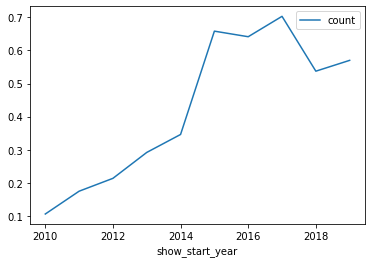

In [65]:
df_show = df[df['box_office'] >= 0].groupby('show_start_year')['box_office'].agg({'count'}) 
df_no_show = df.groupby('show_start_year')['box_office'].agg({'count'})
part_show = df_show / df_no_show
display(part_show)
part_show.plot()
plt.show()

Доля по годам росла. В 2018 году был спад. В 2017 году самая большая доля показов.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

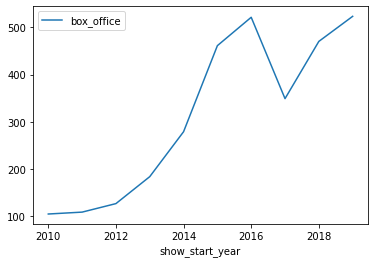

In [66]:
df.query('box_office >= 0').pivot_table(index='show_start_year', values='box_office', aggfunc='count').plot()
plt.show()

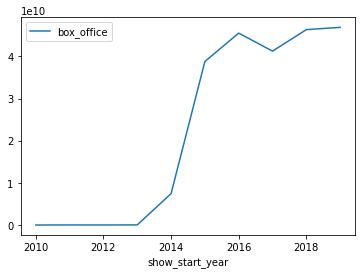

In [67]:
df.query('box_office >= 0').pivot_table(index='show_start_year', values='box_office', aggfunc='sum').plot()
plt.show()

Динамика положительная, однако в 2017-м году был спад. По сумме сборов виден большой рост с 2013 по 2016 год.

In [68]:
pd.options.display.float_format = '{:,.2f}'.format
df.query('box_office >= 0').pivot_table(index='show_start_year', values='box_office', aggfunc='sum').sort_values('box_office')

,box_office
show_start_year,
2010,"2,428,654.00"
2012,"6,911,073.00"
2011,"14,102,765.00"
2013,"29,799,706.20"
2014,"7,444,951,859.20"
2015,"38,793,109,460.87"
2017,"41,261,272,295.51"
2016,"45,533,916,818.51"
2018,"46,360,435,694.42"


Минимальная сумма сборов была в 2010-м году, а максимальная в 2019.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [69]:
df.query('box_office >= 0').pivot_table(
    index='show_start_year',
    values='box_office',
    aggfunc=['mean', 'median']
    ).droplevel(level=1, axis=1)

,mean,median
show_start_year,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,417.90","5,560.00"
2013,"161,954.92","3,522.50"
2014,"26,684,415.27","18,160.00"
2015,"84,149,912.06","4,784,781.50"
2016,"87,397,153.20","3,776,087.56"
2017,"118,227,141.25","9,580,738.00"
2018,"98,639,224.88","8,730,277.53"


Средняя и медианная сумма очень отличается. Вероятно имеем большое количество фильмов с маленькими сборами и небольшая доля с очень большими сборами.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [70]:
df.query('2015 <= show_start_year <= 2019').pivot_table(
    index='age_restriction',
    values='box_office',
    aggfunc='sum'
    ).sort_values('box_office')

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,"602,404,486.97"
«18+» - запрещено для детей,"40,759,615,282.12"
«6+» - для детей старше 6 лет,"50,120,944,980.55"
«12+» - для детей старше 12 лет,"52,459,218,584.17"
«16+» - для детей старше 16 лет,"74,910,389,624.39"


Возрастное ограничение влияет на сборы фильма. Фильмы с ограничением "16+" собрали больше всего, а "0+" меньше всего.

In [71]:
df.query('2015 <= show_start_year <= 2019').pivot_table(
    index='age_restriction',
    values='box_office',
    columns='show_start_year',
    aggfunc='sum')

show_start_year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,"379,054,567.37","150,034,289.67","23,120,703.00","32,448,930.11","17,745,996.82"
«12+» - для детей старше 12 лет,"13,091,691,405.81","11,638,798,603.59","4,591,264,847.67","11,174,968,254.96","11,962,495,472.14"
«16+» - для детей старше 16 лет,"11,368,120,789.27","16,300,263,315.14","18,233,267,320.06","16,503,602,267.96","12,505,135,931.96"
«18+» - запрещено для детей,"5,432,308,307.44","6,793,929,724.87","9,651,495,556.02","8,760,085,462.15","10,121,796,231.64"
«6+» - для детей старше 6 лет,"8,521,934,150.98","10,650,890,593.24","8,762,123,720.76","9,889,330,374.24","12,296,666,141.33"


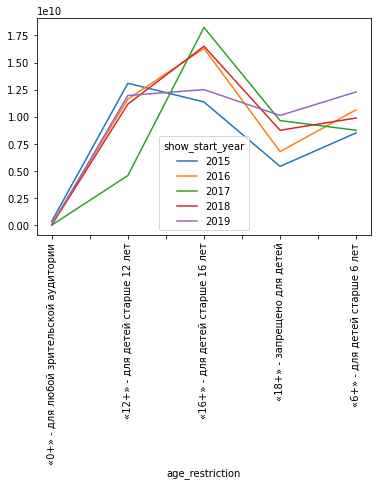

In [72]:
df.query('2015 <= show_start_year <= 2019').pivot_table(
    index='age_restriction',
    values='box_office',
    columns='show_start_year',
    aggfunc='sum').plot()
plt.xticks(rotation=90)
plt.show()

Из года в год для некоторых категорий ситуация меняется, можно предположить, что из-за выхода топовых новинок для определенных категорий с очень большими сборами.

### Краткий вывод:


Доля фильмов с указанной информацией о прокате в кинотеатрах составляет 42%.<br>
По сумме сборов большой рост с 2013 по 2016 год.<br>
Минимальная сумма сборов была в 2010-м году, а максимальная в 2019.<br>
Возрастное ограничение влияет на сборы фильма и зависит от года.

## Исследование фильмов с гос поддержкой

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Выделим данные с гос поддеркой.

In [73]:
df_gos = df.query('full_support > 0')
display(df_gos.head(3))
df_gos.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,full_support,show_start_year,main_producer,main_genre,part_support
1280,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"79,411,900.00",Министерство культуры,8.1,"драма,мелодрама","365,353.60","26,500,000.00",2013,А.Атанесян,драма,0.33
1446,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"37,142,857.00",Министерство культуры,NaN,unknown,"28,140.00","26,000,000.00",2014,А.Тютрюмов,unknown,0.70
1496,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"176,023,490.00",Фонд кино,5.3,"комедия,фантастика","19,957,031.50","107,847,945.00",2013,Р.Давлетьяров,комедия,0.61


<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 1280 to 7450
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  304 non-null    object             
 1   puNumber               304 non-null    int64              
 2   show_start_date        304 non-null    datetime64[ns, UTC]
 3   type                   304 non-null    object             
 4   film_studio            304 non-null    object             
 5   production_country     304 non-null    object             
 6   director               304 non-null    object             
 7   producer               302 non-null    object             
 8   age_restriction        304 non-null    object             
 9   refundable_support     304 non-null    float64            
 10  nonrefundable_support  304 non-null    float64            
 11  budget                 304 non-null    float64        

Посмотрим сколько выделяют средств на поддержку кино.

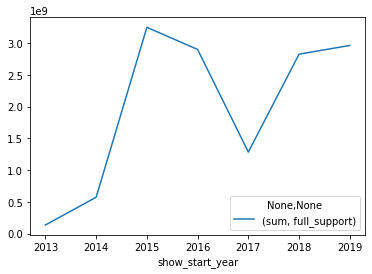

In [74]:
df_gos.pivot_table(index='show_start_year', values='full_support', aggfunc=['sum']).plot()
plt.show()

В 2016 и 2017 годах был большой спад в гос поддержке.<br>
Добавим данные по окупаемости фильмов.

In [75]:
df_gos = df_gos.copy()
df_gos['support_value'] = df_gos['box_office'] - df_gos['full_support']

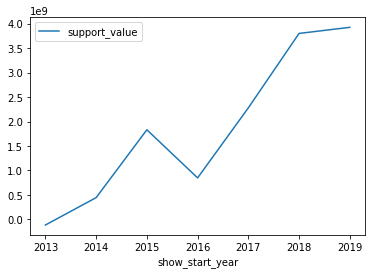

In [76]:
df_gos.pivot_table(index='show_start_year', values='support_value', aggfunc='sum').plot()
plt.show()

Окупаемость фильмов в среднем ростет. В 2016 году был спад.<br>

In [77]:
df_gos.pivot_table(
    index='show_start_year',
    values='support_value',
    aggfunc=['count', 'sum']
    ).droplevel(level=1, axis=1)

,count,sum
show_start_year,,
2013,2,"-114,025,559.90"
2014,16,"445,419,867.60"
2015,82,"1,831,367,277.61"
2016,57,"848,468,441.70"
2017,33,"2,278,668,714.96"
2018,52,"3,799,173,330.35"
2019,62,"3,923,758,834.93"


Маленькая окупаемость в 2016-м году не зависит от количества фильмов. Фильмов было много, а доход маленький.  
<br>Проверим оценки фильмов.

In [78]:
df_gos.isna().sum()

title                     0
puNumber                  0
show_start_date           0
type                      0
film_studio               0
production_country        0
director                  0
producer                  2
age_restriction           0
refundable_support        0
nonrefundable_support     0
budget                    0
financing_source          0
ratings                  16
genres                    0
box_office                0
full_support              0
show_start_year           0
main_producer             2
main_genre                0
part_support              0
support_value             0
dtype: int64

In [79]:
df_gos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 1280 to 7450
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  304 non-null    object             
 1   puNumber               304 non-null    int64              
 2   show_start_date        304 non-null    datetime64[ns, UTC]
 3   type                   304 non-null    object             
 4   film_studio            304 non-null    object             
 5   production_country     304 non-null    object             
 6   director               304 non-null    object             
 7   producer               302 non-null    object             
 8   age_restriction        304 non-null    object             
 9   refundable_support     304 non-null    float64            
 10  nonrefundable_support  304 non-null    float64            
 11  budget                 304 non-null    float64        

Удалим пропуски с рейтингом. И приведем данные к нужному типу.

In [80]:
df_gos.dropna(subset=['ratings'], inplace=True)

In [81]:
df_gos.isna().sum()

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 2
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
full_support             0
show_start_year          0
main_producer            2
main_genre               0
part_support             0
support_value            0
dtype: int64

In [82]:
df_gos['ratings'] = pd.to_numeric(df_gos['ratings'], errors='raise')

In [83]:
df_gos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 1280 to 7450
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  288 non-null    object             
 1   puNumber               288 non-null    int64              
 2   show_start_date        288 non-null    datetime64[ns, UTC]
 3   type                   288 non-null    object             
 4   film_studio            288 non-null    object             
 5   production_country     288 non-null    object             
 6   director               288 non-null    object             
 7   producer               286 non-null    object             
 8   age_restriction        288 non-null    object             
 9   refundable_support     288 non-null    float64            
 10  nonrefundable_support  288 non-null    float64            
 11  budget                 288 non-null    float64        

<AxesSubplot:xlabel='show_start_year'>

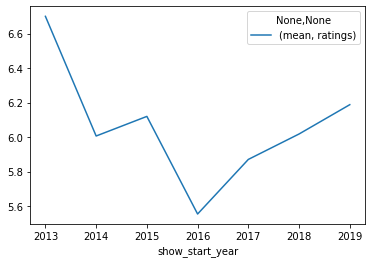

In [84]:
df_gos.pivot_table(index='show_start_year', values='ratings', aggfunc=['mean']).plot()

Видим, что средний рейтинг до 2016 года падал и был минимальный. В этом году была и маленькая окупаемость. Далее рейтинг начал рости вместе с окупаемостью.

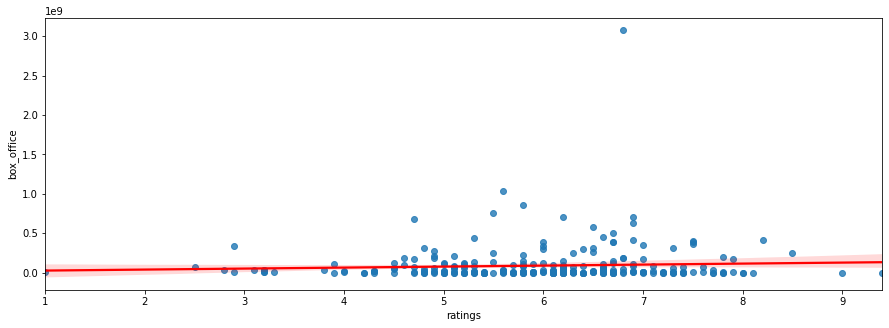

In [85]:
plt.figure(figsize = (15,5))
sns.regplot(x = 'ratings', y = 'box_office', data = df_gos, line_kws={'color':'red'})
plt.show()

Можно наблюдать, что чем выше рейтинг, тем больше сборы.

In [86]:
df_gos.pivot_table(index='financing_source', values='nonrefundable_support', aggfunc='sum')

,nonrefundable_support
financing_source,
Министерство культуры,"4,376,661,000.00"
"Министерство культуры, Фонд кино","768,352,299.00"
Фонд кино,"5,584,022,011.00"


Фонд кино выделяет немного больше средств, чем Министерство культуры.

In [87]:
df_gos.pivot_table(
    index='financing_source',
    values='support_value',
    aggfunc=['count', 'sum']
    ).droplevel(level=1, axis=1)

,count,sum
financing_source,,
Министерство культуры,151,"764,773,760.43"
"Министерство культуры, Фонд кино",20,"-731,658,514.44"
Фонд кино,117,"12,186,936,402.62"


Министерство культуры спонсирует больше фильмов, но у Фонда кино в десяток раз выше окупаемость. Совместно спонсируемые фильмы вообще не окупаются.

In [88]:
df_gos.pivot_table(index='financing_source', values='ratings', aggfunc='mean')

,ratings
financing_source,
Министерство культуры,6.14
"Министерство культуры, Фонд кино",6.40
Фонд кино,5.71


У фильмов спонсируемых Министерством культуры выше рейтинг, а фильмы с совместным спонсирование имеют самый высокий средний рейтинг, хотя совсем не окупаются.

## Общий вывод

Объединили данные в один датафрейм. Привели данные к нормальному типу где это необходимо. Обработали пропуски значений. Найдена связь в большом количестве пропусков в жанре и рейтинге. Нужно сообщить тем кто предоставил данные, может исправят и дадут новые хорошие данные. Анализ дубликатов по названию выявил, что есть дубликаты, но у них разные даты стартов показов и разные прокатные удостоверения. Нашли две ошибки в данных о прокатных удостоверениях. Исправили ошибки в категориальных и количественных данных. Очистили данные от выбросов. Так же добавили столбцы с новыми данными - именем и фамилией главного режиссёра, основным жанром фильма, общую сумму гос поддержки, прибыль, долю гос поддержки в бюджете фильма

Доля фильмов с указанной информацией о прокате в кинотеатрах составляет 42%. Доля по годам росла. В 2018 году был спад. В 2017 году самая большая доля показов. <br>
Динамика проката положительная, однако в 2017-м году был спад. По сумме сборов большой рост с 2013 по 2016 год.<br>
Минимальная сумма сборов была в 2010-м году, а максимальная в 2019.<br>
Возрастное ограничение влияет на сборы фильма и зависит от года. Фильмы с ограничением "16+" собрали больше всего, а "0+" меньше всего.

В 2016 и 2017 годах был большой спад в гос поддержке. <br>
Окупаемость фильмов в среднем ростет. В 2016 году был спад. Маленькая окупаемость в 2016-м году не зависит от количества фильмов. Фильмов было много, а доход маленький. Видим, что средний рейтинг до 2016 года падал и был минимальный. В этом году была и маленькая окупаемость. Далее рейтинг начал рости вместе с окупаемостью.<br>
Фонд кино выделяет больше средств, чем Министерство культуры. Министерство культуры спонсирует больше фильмов, но у Фонда кино в десяток раз выше окупаемость. Совместно спонсируемые фильмы вообще не окупаются. У фильмов спонсируемых Министерством культуры выше рейтинг, а фильмы с совместным спонсирование имеют самый высокий средний рейтинг, хотя совсем не окупаются.

Можно предположить, что Фонд кино спонсирует больше фильмов для Кино-проката с высокой стоимостью и хорошими сборами. А Министерство культуры больше выделяют средств на фильмы для ТВ-показа, фильмы имеют хорошие рейтинги, но из-за малых показов в кинотеатрах - малые сборы и окупаемость.